# **Oil/Gas Production_Prediction Model**
## **Name: ASHIK MUHAMMED**
## **Organization: Entri Elevate** 
## **Date: [Evaluation Date]**

###  Overview
    To predict the Oil/Gas production succuesfully

###  Objective
    To build and predict the annual oil/Gas production rates of various oil wells with the most accurate Machine-learning Models


###  Data Description


 

### Data Collection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

In [5]:
data=pd.read_csv('oil-and-gas-summary-production-data-1967-1999-1 (2).csv')

In [6]:
df=pd.DataFrame(data)

In [7]:
df.head(10)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,04/02/1996,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,MEDINA,0,0,13,2,0,0,NO,0,27742,377,24177,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,04/05/1995,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,ONONDAGA-BASS ISLAND,1,3,1,0,0,0,NO,96,1582,730,1439,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,03/15/1995,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,MEDINA,0,0,1,0,0,0,YES,0,500,0,0,NaN,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,09/12/1996,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,ORISKANY,0,0,1,3,0,0,NO,0,484927,0,484927,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,10/18/1996,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,MEDINA,0,0,1,0,0,0,YES,0,100,0,0,NaN,"VILLENOVA, NY\n(42.391743, -79.119456)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30053 entries, 0 to 30052
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Production Year          30053 non-null  int64 
 1   Production Date Entered  30053 non-null  object
 2   Operator                 30053 non-null  object
 3   County                   30022 non-null  object
 4   Town                     29396 non-null  object
 5   Field                    28772 non-null  object
 6   Producing Formation      29393 non-null  object
 7   Active Oil Wells         30053 non-null  int64 
 8   Inactive Oil Wells       30053 non-null  int64 
 9   Active Gas Wells         30053 non-null  int64 
 10  Inactive Gas Wells       30053 non-null  int64 
 11  Injection Wells          30053 non-null  int64 
 12  Disposal Wells           30053 non-null  int64 
 13  Self-use Well            29434 non-null  object
 14  Oil Produced, bbl        30053 non-nul

##### There are 11 features with int datatype and 9 features with object datatype

In [10]:
df.describe()

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,3.005300e+04,3.005300e+04,3.005300e+04
mean,1987.929225,5.040262,1.391209,3.724553,0.600106,1.270489,0.044821,811.933118,1.811270e+04,6.251382e+03,9.025647e+03
std,7.935213,25.146264,8.449948,12.362509,2.449830,16.456011,5.093759,8263.100877,8.805514e+04,1.787794e+05,7.249590e+04
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1989.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.210000e+02,0.000000e+00,0.000000e+00
75%,1994.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.206000e+03,0.000000e+00,0.000000e+00
max,1999.000000,1273.000000,360.000000,684.000000,118.000000,1108.000000,846.000000,675589.000000,4.827263e+06,1.759123e+07,4.827263e+06


In [11]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location'],
      dtype='object')

In [12]:
df.shape

(30053, 20)

##### The data consist of 30053 rows and 20 columns

In [14]:
df.describe(include='object').T


,count,unique,top,freq
Production Date Entered,30053,1257,09/20/1994,272
Operator,30053,1771,National Fuel Gas Supply Corp.,974
County,30022,30,Chautauqua,9137
Town,29396,250,ALLEGANY,1514
Field,28772,229,LAKESHORE,8557
Producing Formation,29393,63,MEDINA,17938
Self-use Well,29434,3,NO,18325
Purchaser Codes,18255,130,GK,6297
Location,30053,251,"ALLEGANY, NY\n(42.088061, -78.491258)",1514


##### Features with object datatype

In [19]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location'],
      dtype='object')

In [20]:
df.head()

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"


### Data Preprocessing

#### Checking for null values

In [23]:
df.isnull().sum()

Production Year                0
Production Date Entered        0
Operator                       0
County                        31
Town                         657
Field                       1281
Producing Formation          660
Active Oil Wells               0
Inactive Oil Wells             0
Active Gas Wells               0
Inactive Gas Wells             0
Injection Wells                0
Disposal Wells                 0
Self-use Well                619
Oil Produced, bbl              0
Gas Produced, Mcf              0
Water produced, bbl            0
Taxable Gas, Mcf               0
Purchaser Codes            11798
Location                       0
dtype: int64

#### Handling Duplicates

In [24]:
df.duplicated().sum()

4

In [43]:
df=df.drop_duplicates()

print("/n2.After Handling Duplicates:")
print("Number of duplicate rows:", df.duplicated().sum())

/n2.After Handling Duplicates:
Number of duplicate rows: 0


In [45]:
# 1. Handling null values
print("\n1. Handling null values:")

df['County'] = df['County'].fillna('Unknown')
df['Town']= df['Town'].fillna('Unknown')
df['Field']=df['Field'].fillna('Unnamed')
df['Self-use Well']= df['Self-use Well'].fillna('Inactive')
df['Purchaser Codes']= df['Purchaser Codes'].fillna('Unknown')

df=df.drop('Producing Formation',axis =1)

print(df.isnull().sum())


1. Handling null values:
Production Year            0
Production Date Entered    0
Operator                   0
County                     0
Town                       0
Field                      0
Active Oil Wells           0
Inactive Oil Wells         0
Active Gas Wells           0
Inactive Gas Wells         0
Injection Wells            0
Disposal Wells             0
Self-use Well              0
Oil Produced, bbl          0
Gas Produced, Mcf          0
Water produced, bbl        0
Taxable Gas, Mcf           0
Purchaser Codes            0
Location                   0
dtype: int64


In [ ]:
##### Droping column

In [47]:
df.drop(columns = ['Production Date Entered'],inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30049 entries, 0 to 30052
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Production Year      30049 non-null  int64 
 1   Operator             30049 non-null  object
 2   County               30049 non-null  object
 3   Town                 30049 non-null  object
 4   Field                30049 non-null  object
 5   Active Oil Wells     30049 non-null  int64 
 6   Inactive Oil Wells   30049 non-null  int64 
 7   Active Gas Wells     30049 non-null  int64 
 8   Inactive Gas Wells   30049 non-null  int64 
 9   Injection Wells      30049 non-null  int64 
 10  Disposal Wells       30049 non-null  int64 
 11  Self-use Well        30049 non-null  object
 12  Oil Produced, bbl    30049 non-null  int64 
 13  Gas Produced, Mcf    30049 non-null  int64 
 14  Water produced, bbl  30049 non-null  int64 
 15  Taxable Gas, Mcf     30049 non-null  int64 
 16  Purchaser

In [51]:
df.describe()

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,3.004900e+04,3.004900e+04,3.004900e+04
mean,1987.929415,5.040900,1.391361,3.724849,0.600186,1.270658,0.044827,812.041199,1.811456e+04,6.252214e+03,9.026848e+03
std,7.934531,25.147877,8.450499,12.363298,2.449983,16.457099,5.094098,8263.645541,8.806082e+04,1.787913e+05,7.250065e+04
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1989.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.210000e+02,0.000000e+00,0.000000e+00
75%,1994.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.206000e+03,0.000000e+00,0.000000e+00
max,1999.000000,1273.000000,360.000000,684.000000,118.000000,1108.000000,846.000000,675589.000000,4.827263e+06,1.759123e+07,4.827263e+06


In [53]:
df.columns

Index(['Production Year', 'Operator', 'County', 'Town', 'Field',
       'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil Produced, bbl', 'Gas Produced, Mcf',
       'Water produced, bbl', 'Taxable Gas, Mcf', 'Purchaser Codes',
       'Location'],
      dtype='object')

In [55]:
df.shape

(30049, 18)

#### Renaming columns

In [58]:
df= df.rename(columns={'Production Year':'year',
                       'County':'Country',
                       'Oil Produced, bbl':'Oil_production',
                       'Gas Produced, Mcf':'Gas_production',
                       'Water produced, bbl':'Water_production',
                       'Taxable Gas, Mcf':'Taxable_gas'})

In [60]:
df.columns

Index(['year', 'Operator', 'Country', 'Town', 'Field', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well', 'Oil_production',
       'Gas_production', 'Water_production', 'Taxable_gas', 'Purchaser Codes',
       'Location'],
      dtype='object')

In [68]:
df.shape

(30049, 18)

#### Numerical categorical columns

In [72]:
num_cols = df.select_dtypes(include='number').columns

print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (11,)
Numeric Features: Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Oil_production', 'Gas_production', 'Water_production', 'Taxable_gas'],
      dtype='object')


In [74]:
cat_cols = df.select_dtypes(include='object').columns

print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (7,)
Categorical Features: Index(['Operator', 'Country', 'Town', 'Field', 'Self-use Well',
       'Purchaser Codes', 'Location'],
      dtype='object')


In [76]:
df.columns

Index(['year', 'Operator', 'Country', 'Town', 'Field', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well', 'Oil_production',
       'Gas_production', 'Water_production', 'Taxable_gas', 'Purchaser Codes',
       'Location'],
      dtype='object')

### Exploratory Data Analysis 

### Checking for Outliers

In [87]:
num_cols

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Oil_production', 'Gas_production', 'Water_production', 'Taxable_gas'],
      dtype='object')

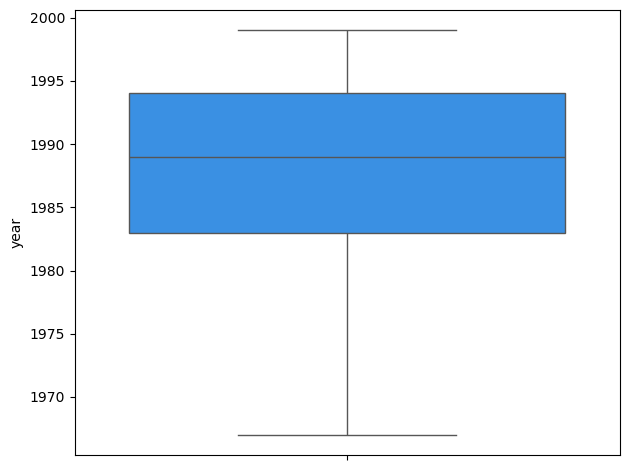

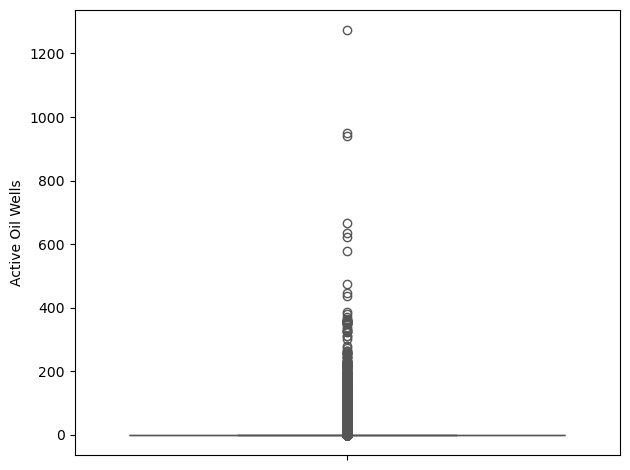

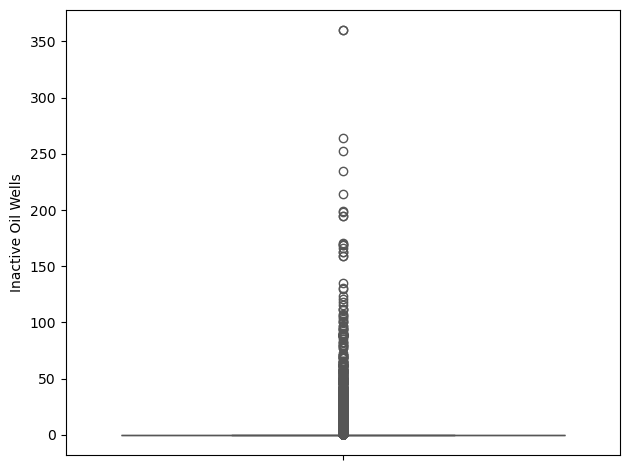

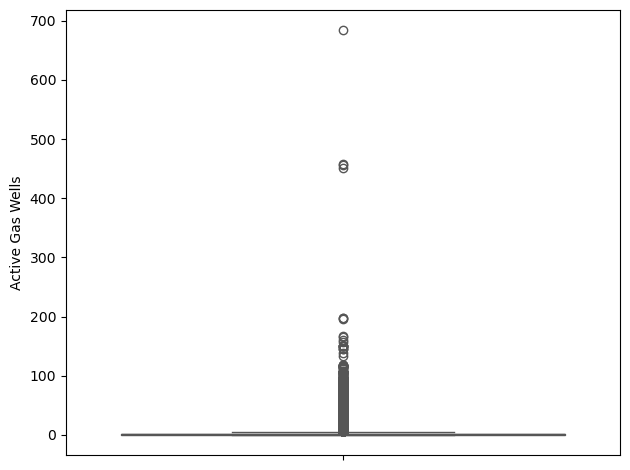

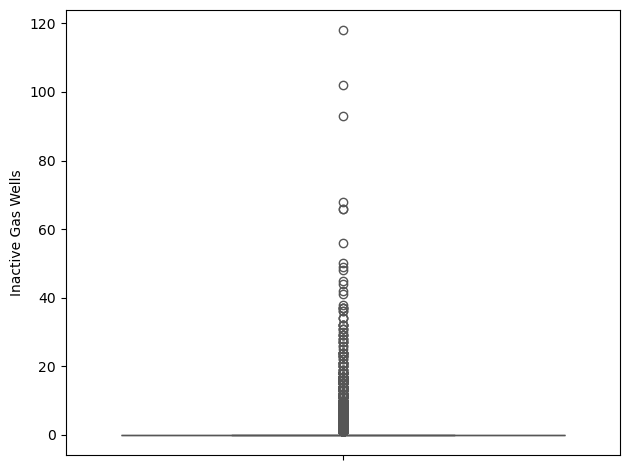

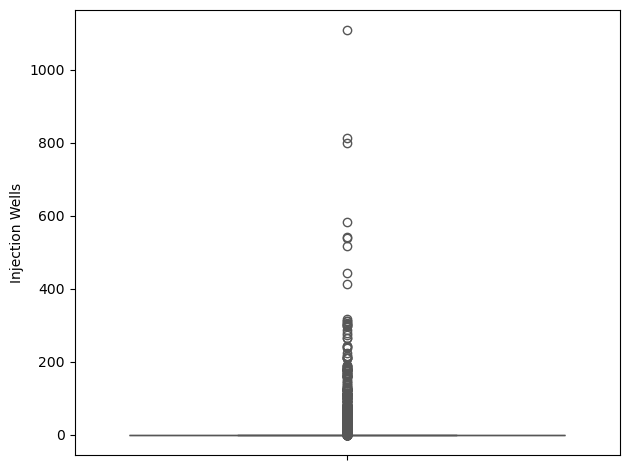

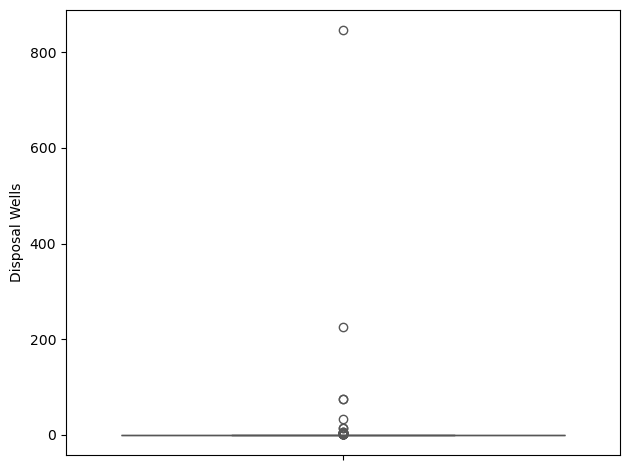

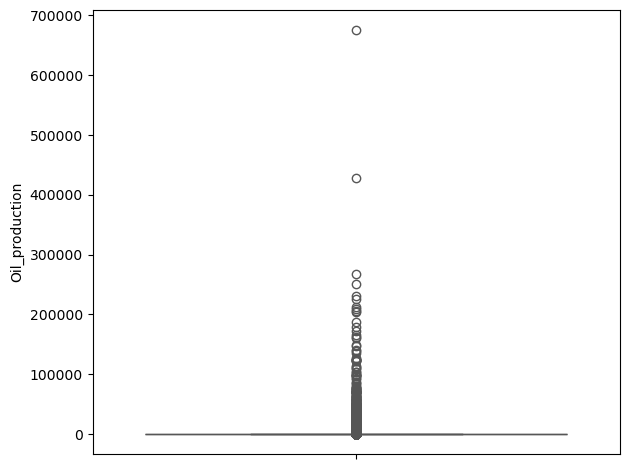

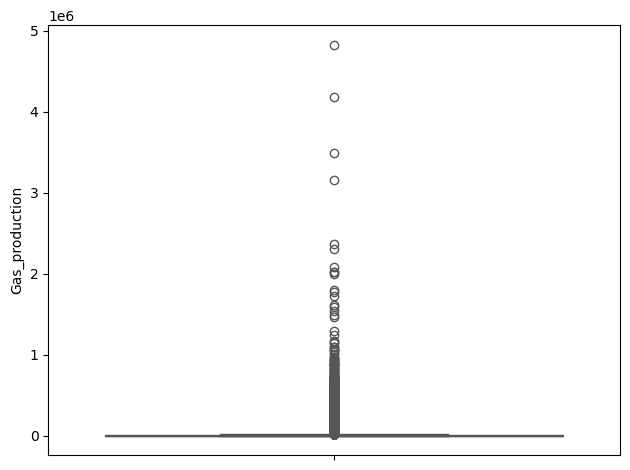

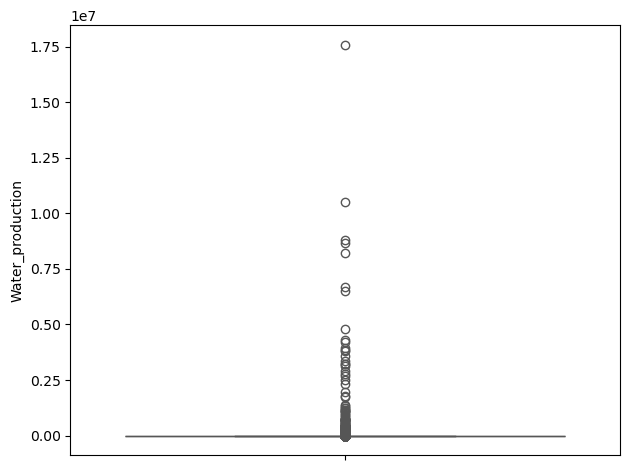

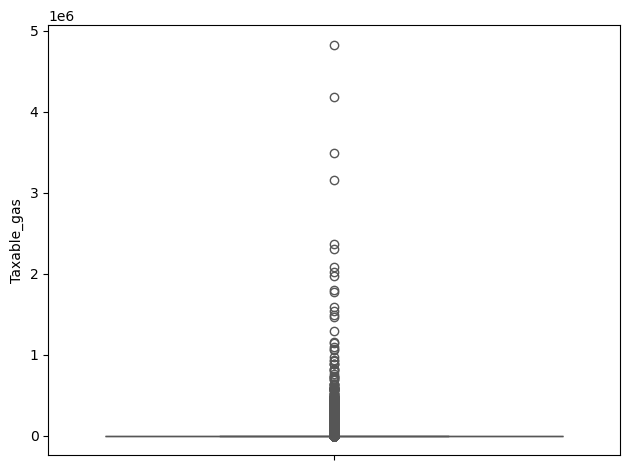

In [97]:
# Box Plot
for i,col in enumerate(num_cols):
    sns.boxplot(y=df[col], color='dodgerblue')
    
    plt.tight_layout()
    plt.show()



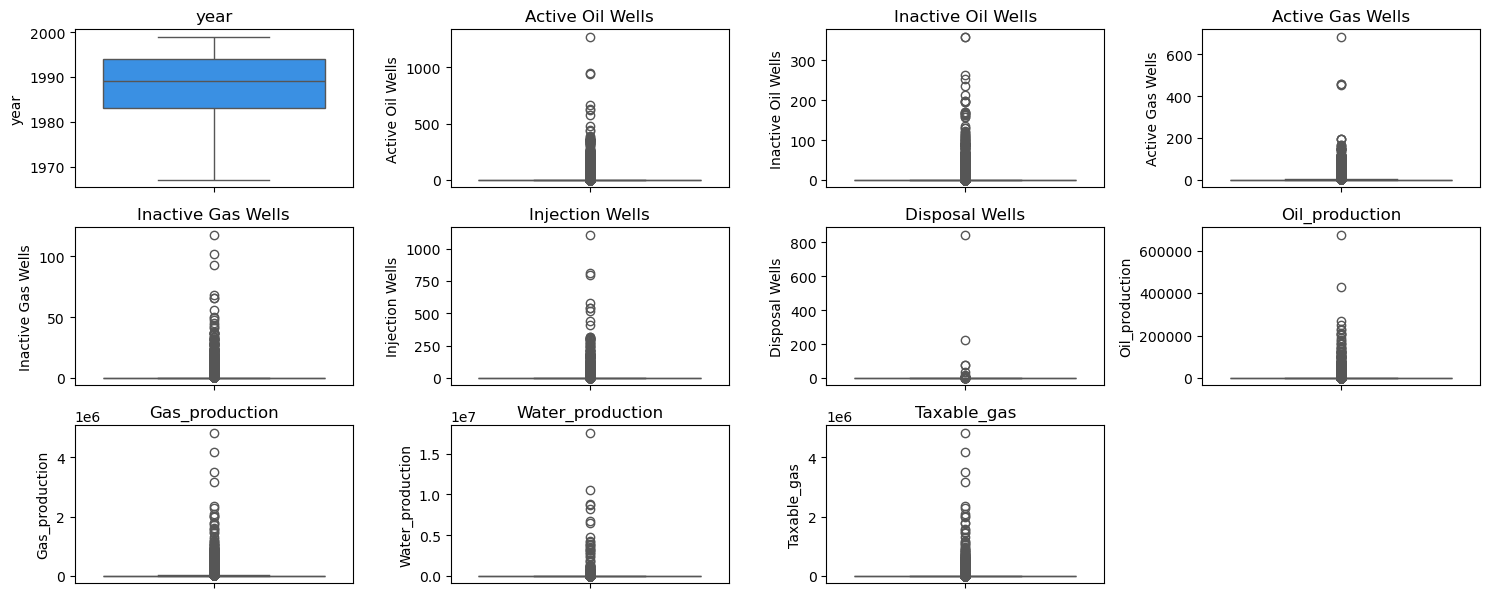

In [89]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

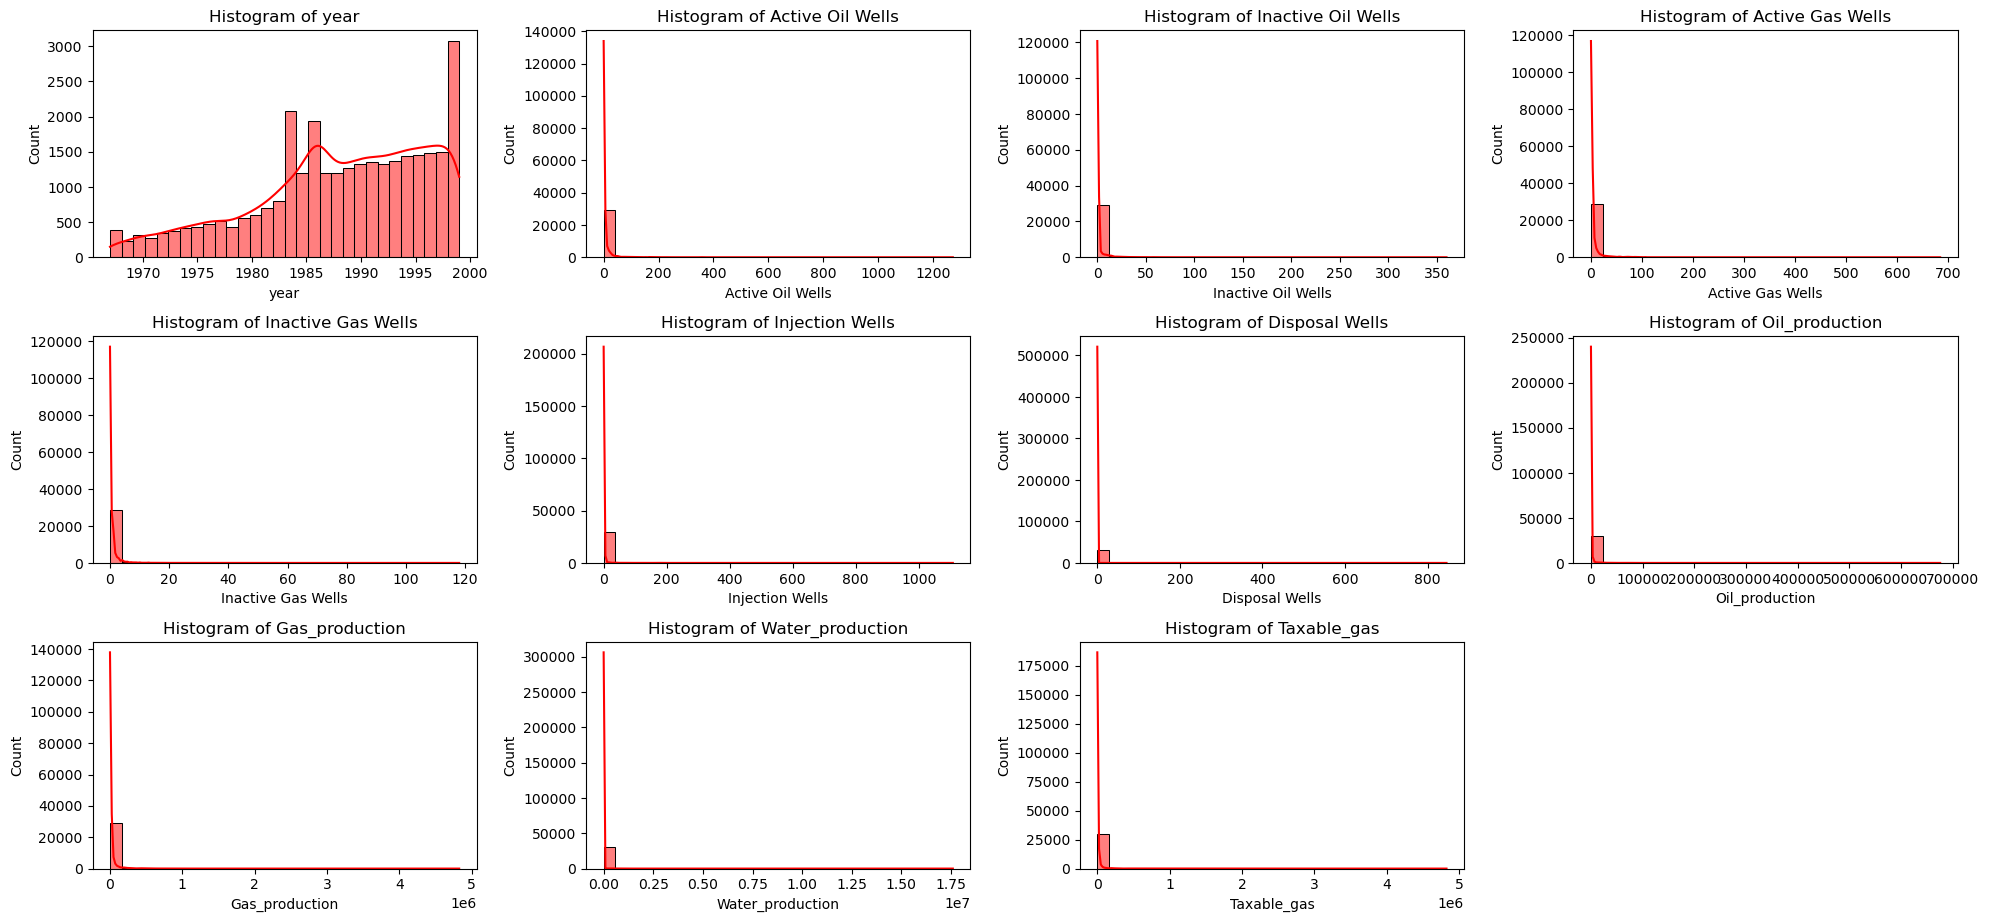

In [109]:
df1= df.copy()
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[num_cols], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30, color='r')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

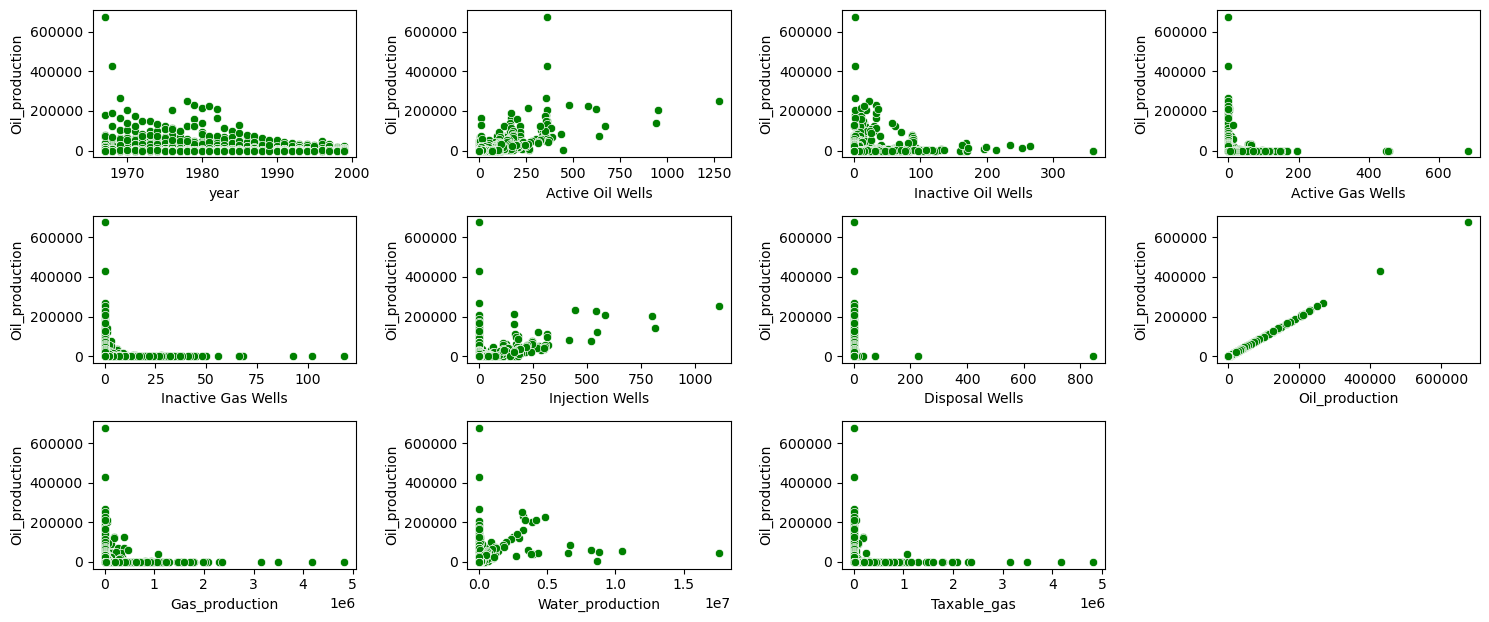

In [113]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Oil_production',color='g')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [119]:
# IQR Methode 
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)


        #Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df

In [121]:
df1 = outliers(df)

In [123]:
df1

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
0,1995,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,106.0,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,530.0,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,"Eastern States Energy, Inc.",Erie,EVANS,BRANT-EDEN,0.0,0.0,5.0,0.0,0.0,0.0,NO,0.0,18015.0,0.0,0.0,GK,"EVANS, NY\n(42.638457, -79.027689)"
30049,1994,P & G Oil Co.,Allegany,WILLING,FULMER VALLEY,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WILLING, NY\n(42.085346, -77.922864)"
30050,1994,"Vandermark Exploration, Inc.",Steuben,WEST UNION,UNNAMED,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WEST UNION, NY\n(42.094951, -77.725816)"
30051,1995,Columbia Natural Resources LLC,Chautauqua,GERRY,LAKESHORE,0.0,0.0,1.0,0.0,0.0,0.0,NO,0.0,3370.0,0.0,0.0,GH,"GERRY, NY\n(42.194749, -79.250394)"


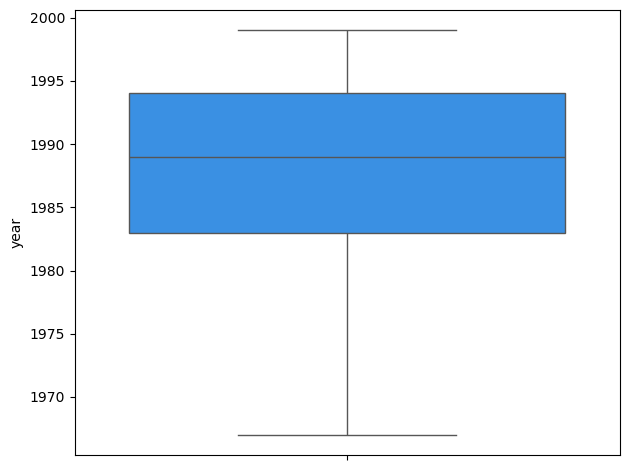

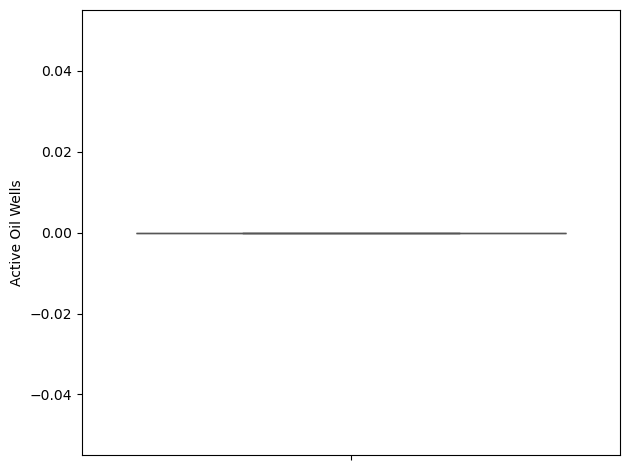

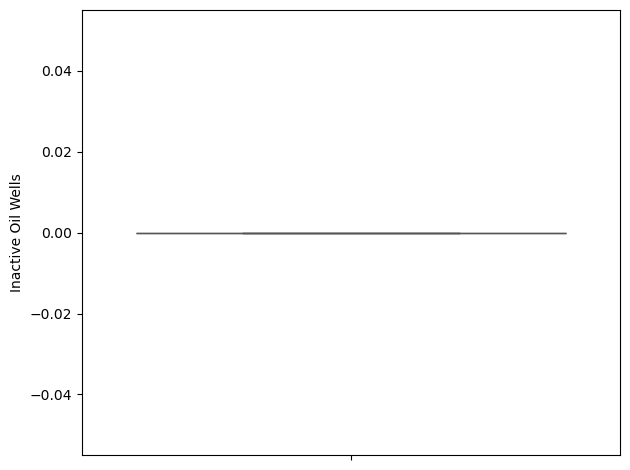

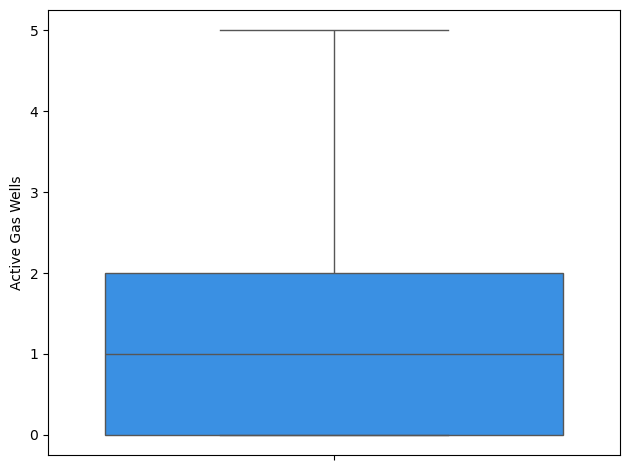

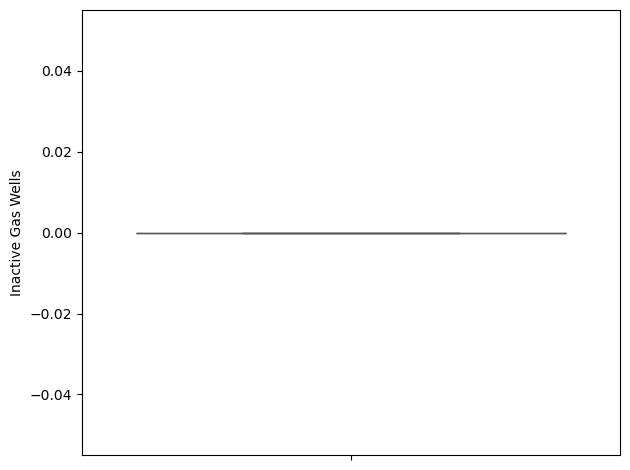

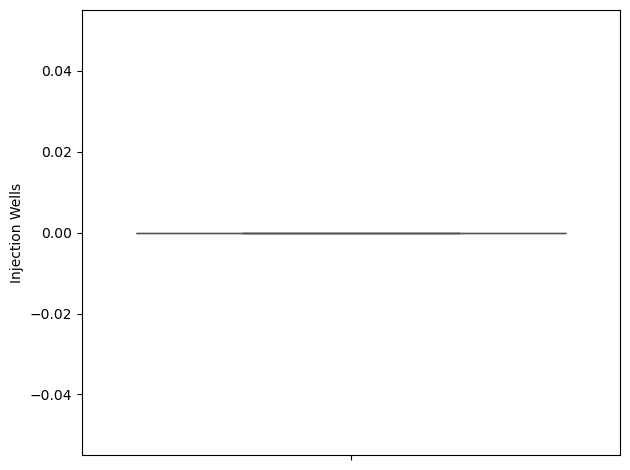

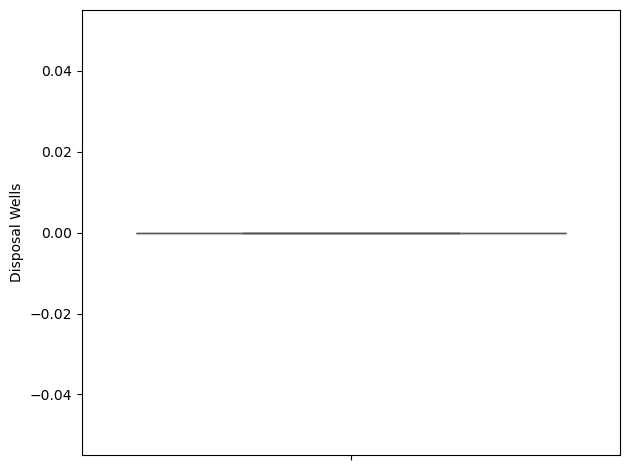

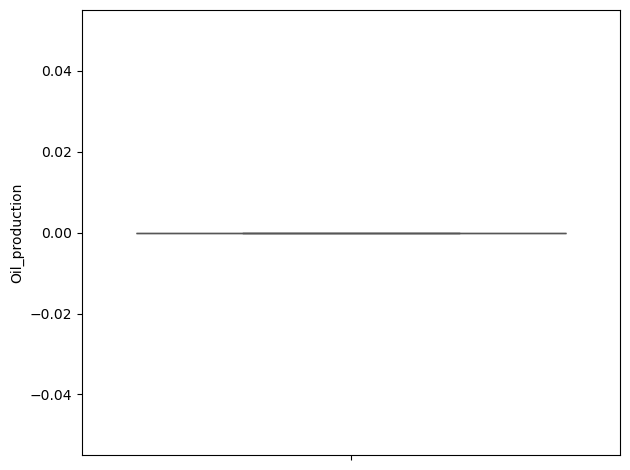

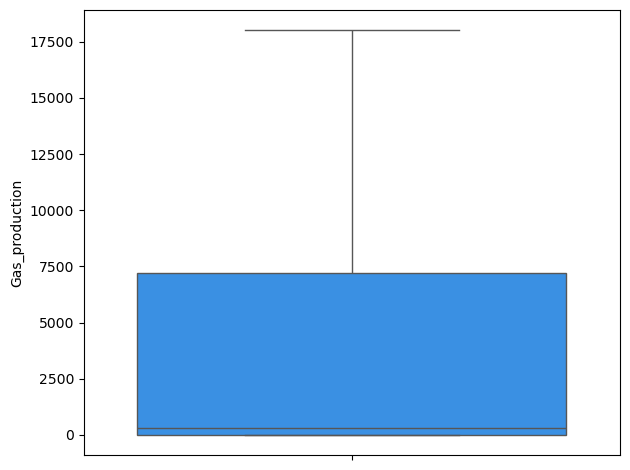

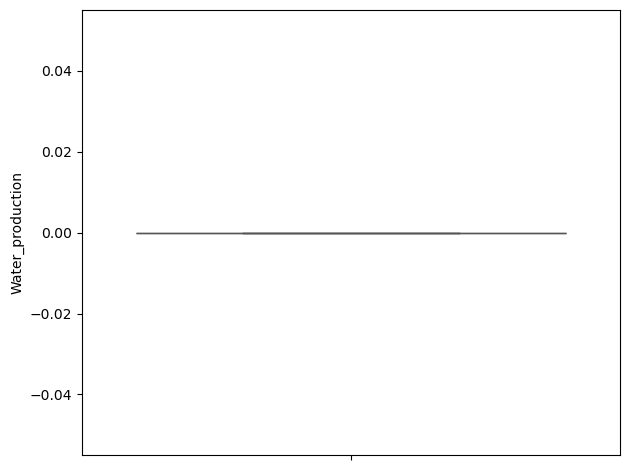

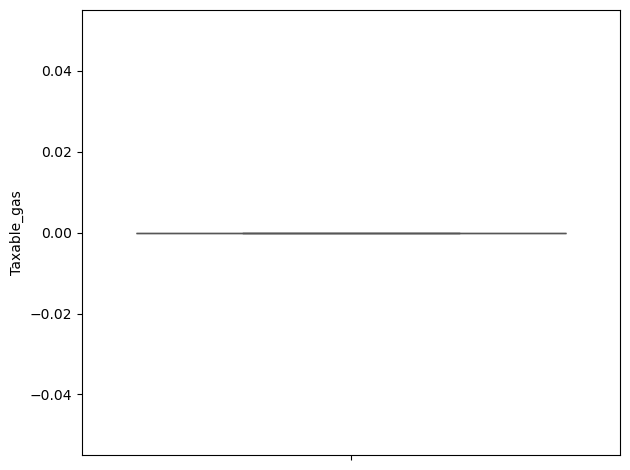

In [125]:
for i,col in enumerate(num_cols):
    sns.boxplot(y=df1[col], color='dodgerblue')
    
    plt.tight_layout()
    plt.show()

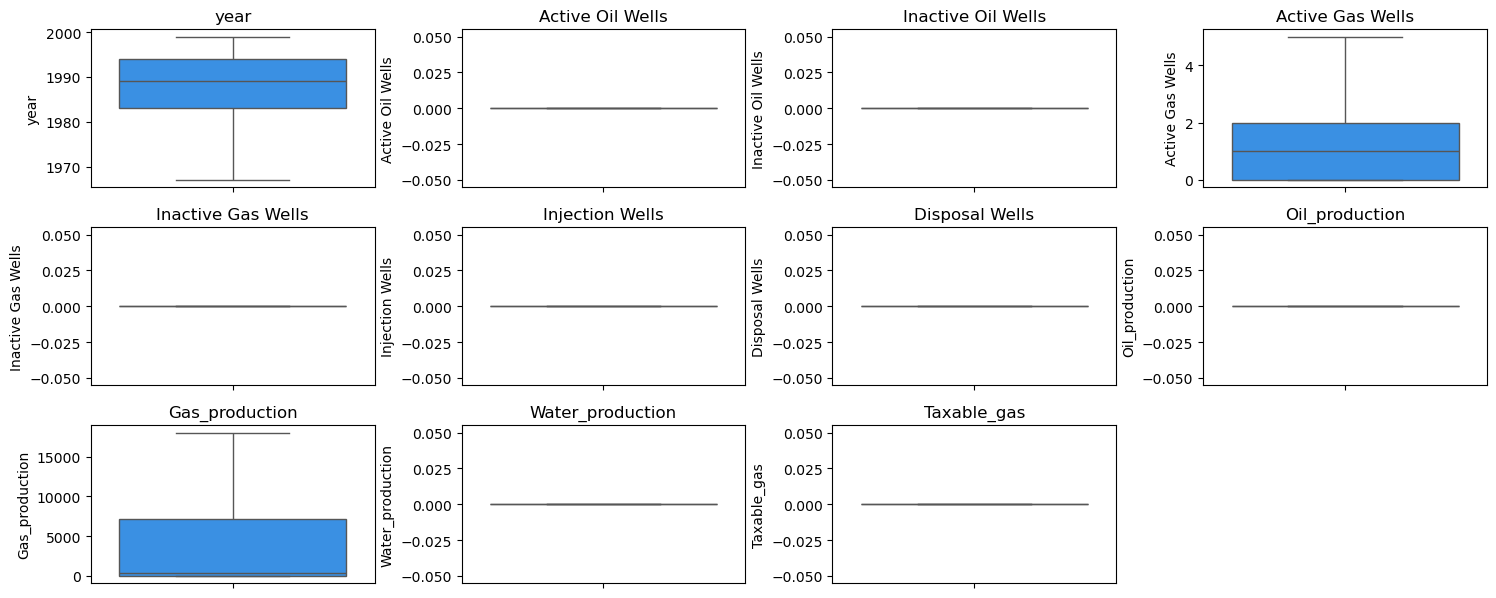

In [127]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

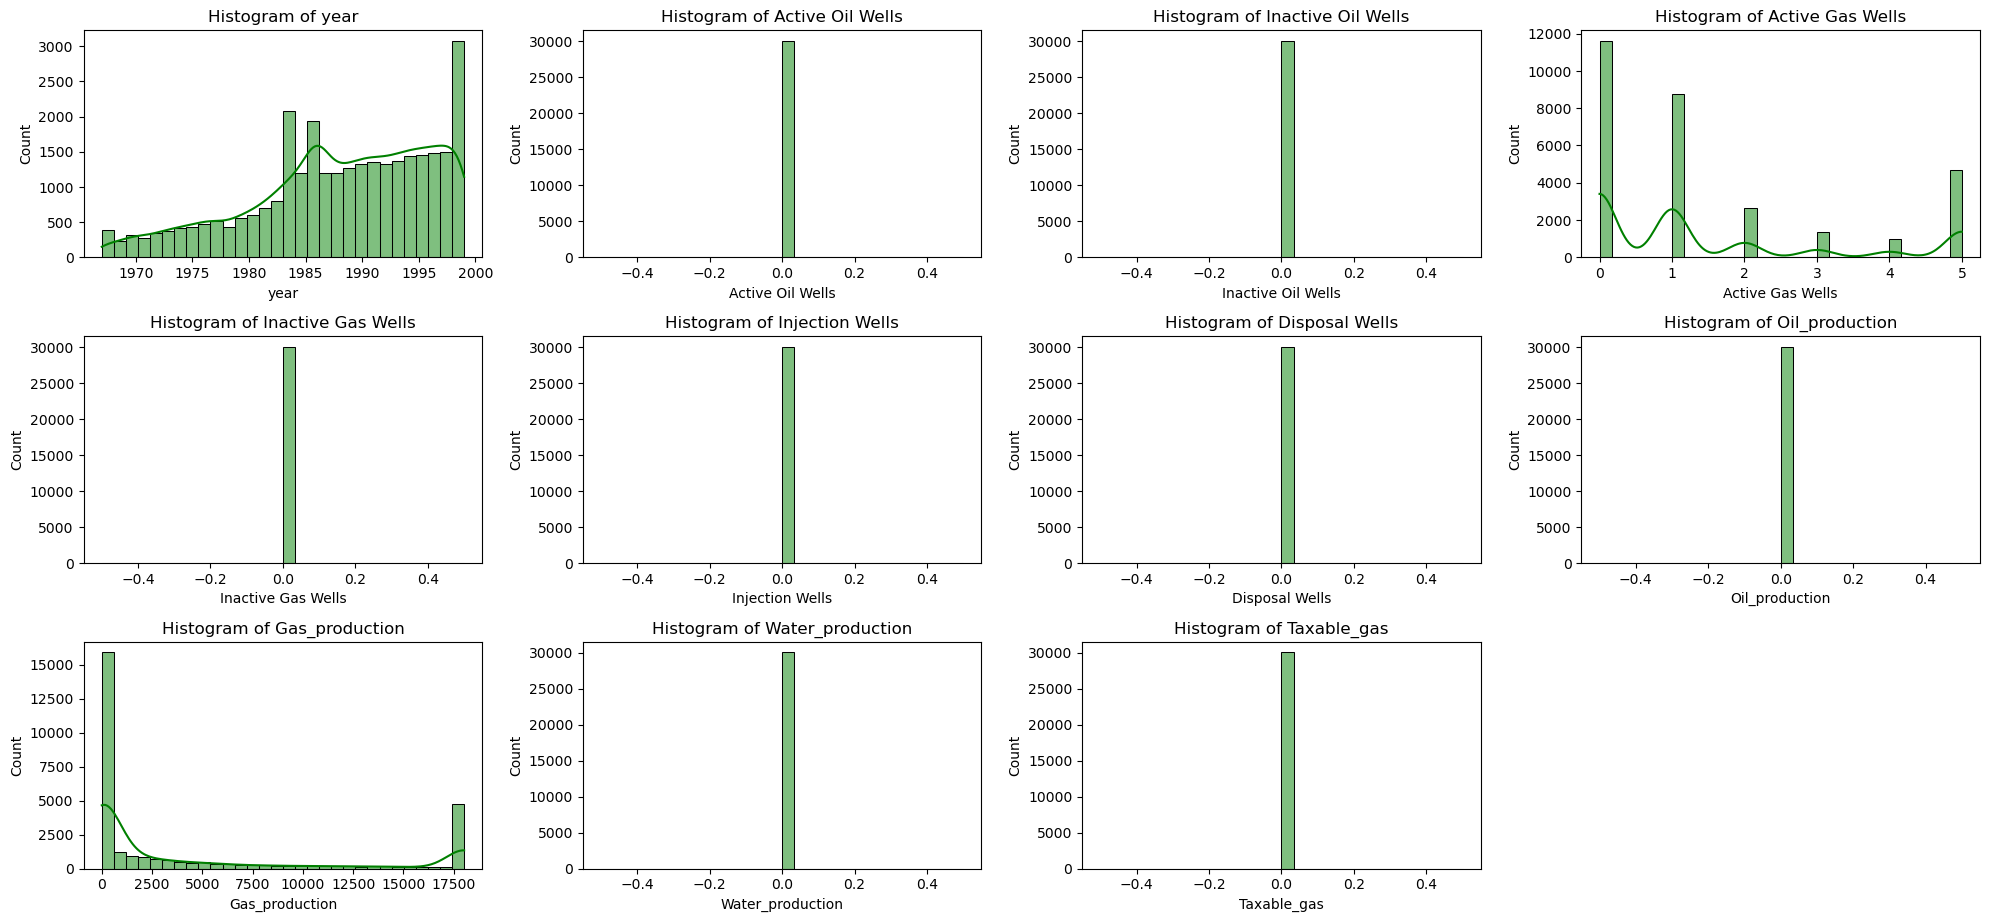

In [133]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[num_cols], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30, color='g')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

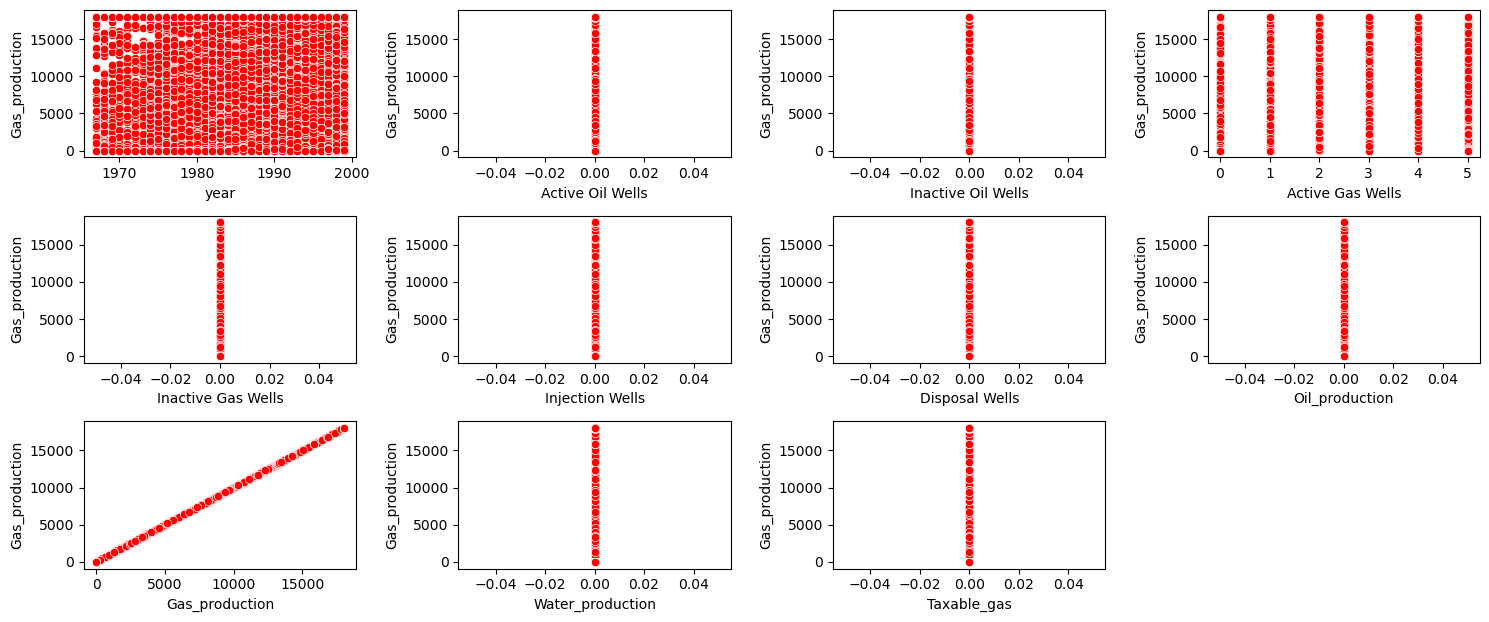

In [145]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Gas_production',color='r')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

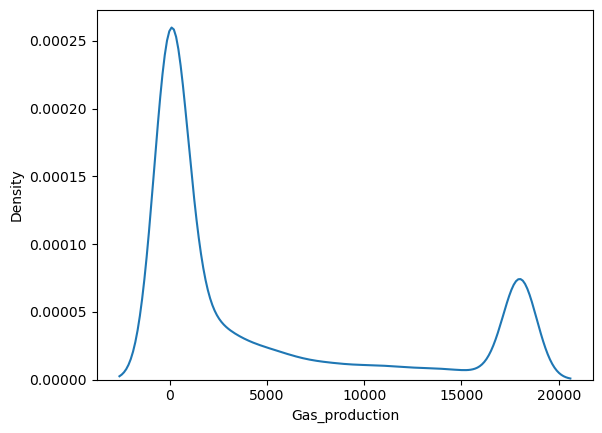

In [141]:
sns.kdeplot(df1.Gas_production)
plt.show()

In [147]:
corr1=df1[num_cols].corr()

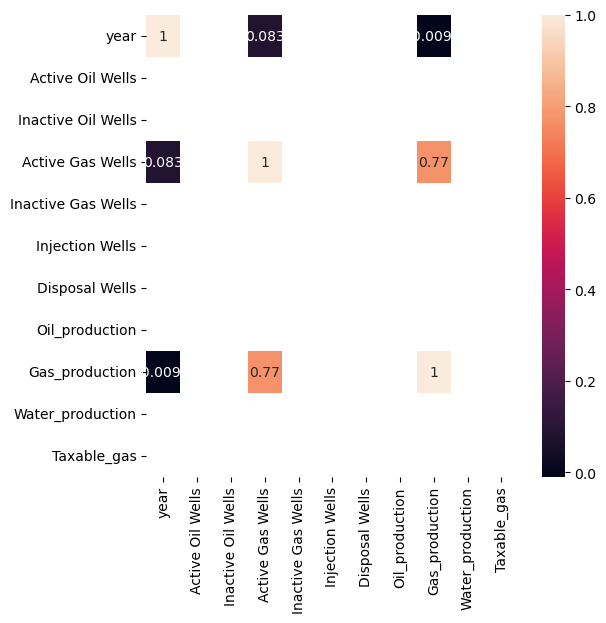

In [159]:
plt.figure(figsize= (6,6))
sns.heatmap(corr1, annot = True)
plt.savefig("corre.png")
plt.show()

## Feature Engineering : 
    #Encoding categorical variables

In [167]:
df1.head(10)

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
0,1995,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,106.0,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,530.0,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,0.0,0.0,5.0,0.0,0.0,0.0,NO,0.0,18015.0,0.0,0.0,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,0.0,0.0,1.0,0.0,0.0,0.0,NO,0.0,1582.0,0.0,0.0,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,500.0,0.0,0.0,Unknown,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,0.0,0.0,1.0,0.0,0.0,0.0,NO,0.0,18015.0,0.0,0.0,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,100.0,0.0,0.0,Unknown,"VILLENOVA, NY\n(42.391743, -79.119456)"


In [169]:
# Label encoding Feature self_use_well
le = LabelEncoder()

df1['Self-use Well'] = le.fit_transform(df1['Self-use Well'])

In [171]:
df1

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
0,1995,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,106.0,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,530.0,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,"Eastern States Energy, Inc.",Erie,EVANS,BRANT-EDEN,0.0,0.0,5.0,0.0,0.0,0.0,2,0.0,18015.0,0.0,0.0,GK,"EVANS, NY\n(42.638457, -79.027689)"
30049,1994,P & G Oil Co.,Allegany,WILLING,FULMER VALLEY,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,Unknown,"WILLING, NY\n(42.085346, -77.922864)"
30050,1994,"Vandermark Exploration, Inc.",Steuben,WEST UNION,UNNAMED,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,Unknown,"WEST UNION, NY\n(42.094951, -77.725816)"
30051,1995,Columbia Natural Resources LLC,Chautauqua,GERRY,LAKESHORE,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,3370.0,0.0,0.0,GH,"GERRY, NY\n(42.194749, -79.250394)"


In [175]:
cat_cols

Index(['Operator', 'Country', 'Town', 'Field', 'Self-use Well',
       'Purchaser Codes', 'Location'],
      dtype='object')

In [177]:
cat_cols1 = df.select_dtypes(include='object').columns

In [179]:
cat_cols1

Index(['Operator', 'Country', 'Town', 'Field', 'Purchaser Codes', 'Location'], dtype='object')

In [187]:
df1 = df1.drop('Town', axis = 1)
df1 = df1.drop('Field', axis = 1)
df1 = df1.drop('Location', axis = 1)
df1 = df1.drop('Purchaser Codes', axis = 1)

In [189]:
df1

,year,Operator,Country,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas
0,1995,"Buffalo China, Inc.",Erie,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,106.0,0.0,0.0
1,1995,"Copper Ridge Oil, Inc.",Steuben,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0
2,1994,"White, Walter W. & Christina L.",Cattaraugus,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0
3,1994,"Stiegler, Richard M",Erie,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,530.0,0.0,0.0
4,1995,"Bucher, Charles J",Cattaraugus,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,"Eastern States Energy, Inc.",Erie,0.0,0.0,5.0,0.0,0.0,0.0,2,0.0,18015.0,0.0,0.0
30049,1994,P & G Oil Co.,Allegany,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
30050,1994,"Vandermark Exploration, Inc.",Steuben,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
30051,1995,Columbia Natural Resources LLC,Chautauqua,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,3370.0,0.0,0.0


In [193]:
# One-Hot encoding

df1 = pd.get_dummies(df1,columns=['Operator','Country'])

In [195]:
df1

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,...,Country_Queens,Country_Schuyler,Country_Seneca,Country_Steuben,Country_Tioga,Country_Tompkins,Country_Unknown,Country_Wayne,Country_Wyoming,Country_Yates
0,1995,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,106.0,...,False,False,False,False,False,False,False,False,False,False
1,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
2,1994,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1994,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,530.0,...,False,False,False,False,False,False,False,False,False,False
4,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0.0,0.0,5.0,0.0,0.0,0.0,2,0.0,18015.0,...,False,False,False,False,False,False,False,False,False,False
30049,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
30050,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
30051,1995,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,3370.0,...,False,False,False,False,False,False,False,False,False,False


In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30049 entries, 0 to 30052
Columns: 1814 entries, year to Country_Yates
dtypes: bool(1802), float64(10), int32(1), int64(1)
memory usage: 54.5 MB


In [199]:
boolean_cols = df1.select_dtypes(include='bool').columns

df1[boolean_cols] = df1[boolean_cols].astype(int)

In [201]:
df1

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,...,Country_Queens,Country_Schuyler,Country_Seneca,Country_Steuben,Country_Tioga,Country_Tompkins,Country_Unknown,Country_Wayne,Country_Wyoming,Country_Yates
0,1995,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,106.0,...,0,0,0,0,0,0,0,0,0,0
1,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1994,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1994,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,530.0,...,0,0,0,0,0,0,0,0,0,0
4,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0.0,0.0,5.0,0.0,0.0,0.0,2,0.0,18015.0,...,0,0,0,0,0,0,0,0,0,0
30049,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30050,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
30051,1995,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,3370.0,...,0,0,0,0,0,0,0,0,0,0


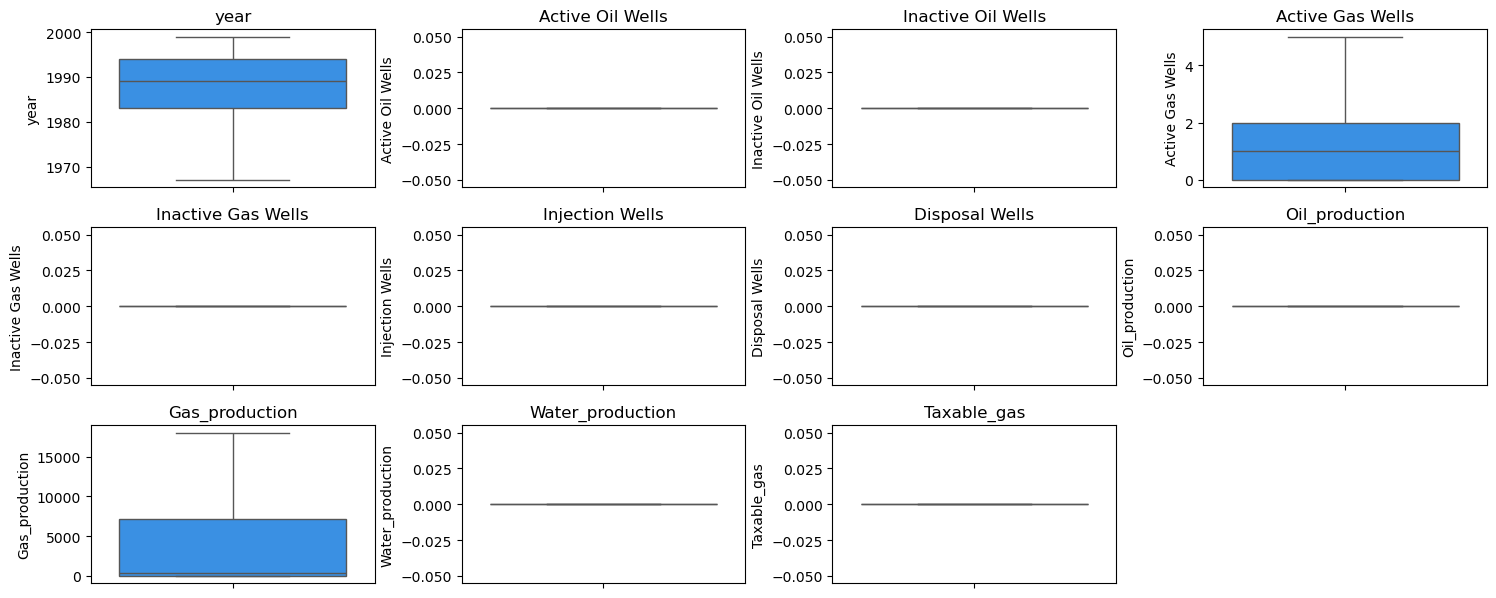

In [204]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [206]:
df1.columns

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil_production', 'Gas_production',
       ...
       'Country_Queens', 'Country_Schuyler', 'Country_Seneca',
       'Country_Steuben', 'Country_Tioga', 'Country_Tompkins',
       'Country_Unknown', 'Country_Wayne', 'Country_Wyoming', 'Country_Yates'],
      dtype='object', length=1814)

### Fearture selection

In [263]:
y=df1.Gas_production

In [265]:
x=df1.drop('Gas_production', axis=1) 

In [269]:
x

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,...,Country_Queens,Country_Schuyler,Country_Seneca,Country_Steuben,Country_Tioga,Country_Tompkins,Country_Unknown,Country_Wayne,Country_Wyoming,Country_Yates
0,1995,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1994,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1994,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0.0,0.0,5.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30049,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30050,1994,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
30051,1995,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=20)

# 2. Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# 3. Get the scores for each feature
feature_scores = k_best.scores_

# 4. Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# 4. Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)

SelectKBest Results:
Features selected: 20
Selected features: ['Active Gas Wells', 'Self-use Well', 'Operator_Belden & Blake Corporation', 'Operator_Berea Oil & Gas Corp.', 'Operator_Chautauqua Energy, Inc.', 'Operator_Empire Exploration, Inc.', 'Operator_Envirogas, Inc.', 'Operator_Lenape Resources Corp., The', 'Operator_Lomak Operating Company', 'Operator_Meridian Exploration Corp.', 'Operator_National Fuel Gas Supply Corp.', 'Operator_Seneca Resources Corporation', 'Operator_TGX Corp.', 'Operator_Templeton Energy,  Inc.', 'Operator_United States Gypsum Co.', 'Operator_Universal Resources Holdings, Incorporated', 'Country_Allegany', 'Country_Cattaraugus', 'Country_Chautauqua', 'Country_Genesee']

Feature Scores:
                                  Feature         Score
3                        Active Gas Wells  44939.731186
1786                   Country_Chautauqua   1711.290594
1782                     Country_Allegany   1669.711372
7                           Self-use Well    854.771

In [271]:
X_k_best_df.head()

,Active Gas Wells,Self-use Well,Operator_Belden & Blake Corporation,Operator_Berea Oil & Gas Corp.,"Operator_Chautauqua Energy, Inc.","Operator_Empire Exploration, Inc.","Operator_Envirogas, Inc.","Operator_Lenape Resources Corp., The",Operator_Lomak Operating Company,Operator_Meridian Exploration Corp.,Operator_National Fuel Gas Supply Corp.,Operator_Seneca Resources Corporation,Operator_TGX Corp.,"Operator_Templeton Energy, Inc.",Operator_United States Gypsum Co.,"Operator_Universal Resources Holdings, Incorporated",Country_Allegany,Country_Cattaraugus,Country_Chautauqua,Country_Genesee
0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [272]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [273]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)

In [274]:
X_standardized

,Active Gas Wells,Self-use Well,Operator_Belden & Blake Corporation,Operator_Berea Oil & Gas Corp.,"Operator_Chautauqua Energy, Inc.","Operator_Empire Exploration, Inc.","Operator_Envirogas, Inc.","Operator_Lenape Resources Corp., The",Operator_Lomak Operating Company,Operator_Meridian Exploration Corp.,Operator_National Fuel Gas Supply Corp.,Operator_Seneca Resources Corporation,Operator_TGX Corp.,"Operator_Templeton Energy, Inc.",Operator_United States Gypsum Co.,"Operator_Universal Resources Holdings, Incorporated",Country_Allegany,Country_Cattaraugus,Country_Chautauqua,Country_Genesee
0,-0.288166,1.214878,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,-0.660848,-0.202085
1,-0.848808,0.123489,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,-0.660848,-0.202085
2,-0.848808,0.123489,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,2.305242,-0.660848,-0.202085
3,-0.288166,1.214878,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,-0.660848,-0.202085
4,-0.848808,0.123489,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,2.305242,-0.660848,-0.202085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30044,1.954400,0.123489,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,-0.660848,-0.202085
30045,-0.848808,-2.059289,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,2.365476,-0.433794,-0.660848,-0.202085
30046,-0.848808,-2.059289,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,-0.660848,-0.202085
30047,-0.288166,0.123489,-0.093605,-0.063848,-0.092514,-0.07224,-0.11906,-0.09141,-0.069634,-0.075206,-0.183029,-0.112568,-0.079134,-0.10634,-0.077194,-0.087632,-0.422748,-0.433794,1.513207,-0.202085


### Split Data into Training and Testing Sets

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state=42)

In [277]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (24039, 20)
Test set shape (features): (6010, 20)
Training set shape (target): (24039,)
Test set shape (target): (6010,)


## Model building 


In [279]:
models={
    'Linear Regressor':LinearRegression(),
    'Descision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'Support Vector Regressor':SVR()
}

### MODEL EVALUATION

In [281]:
results ={}

for model_name, model in models.items():
    # fit the model
    model.fit(X_train, y_train)

    # prediction
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # store the result
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                     MAE           MSE         RMSE        R2
Linear Regressor             2667.278494  1.787587e+07  4227.986294  0.616153
Descision Tree Regressor     2376.195704  1.604800e+07  4005.995334  0.655402
Random Forest Regressor      2375.202293  1.599718e+07  3999.647313  0.656494
Gradient Boosting Regressor  2451.038886  1.628879e+07  4035.937022  0.650232
Support Vector Regressor     4193.085685  5.450477e+07  7382.734774 -0.170377
